# ENN: Edited Nearest Neighbors Rule for Undersampling

Regra para encontrar exemplos ambíguos e de ruído.

Envolve usar k=3 vizinhos mais próximos (knn where k=3) para localizar os exemplos em um dataset que são classificados incorretamente (misclassified) e que são então removidos antes de uma regra de classificação em que k=1 é aplicada.

## Procedimento no undersample:

Para cada instância *a* num dataset:
* Os seus três vizinhos mais próximos são computados
  * Se  *a*  pertence a classe majoritária e é classificada incorretamente por seus três vizinhos mais próximos, *a* é removido do dataset.

  * Se *a* é da classe minoritária e é classificada incorretamente por seus três vizinhos mais próximos, então todas as instâncias da classe majoritária que são parte dos vizinhos mais próximos de *a* são removidos do dataset.


obs: de acordo com as especificações da biblioteca usada pra implementar a técnica, a segunda parte especificada (onde *a* é da classe minoritária) não é feita.

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from imblearn.under_sampling import EditedNearestNeighbours
import pandas as pd

Counter({0: 181, 1: 19})
Counter({0: 166, 1: 19})


<Figure size 1000x600 with 0 Axes>

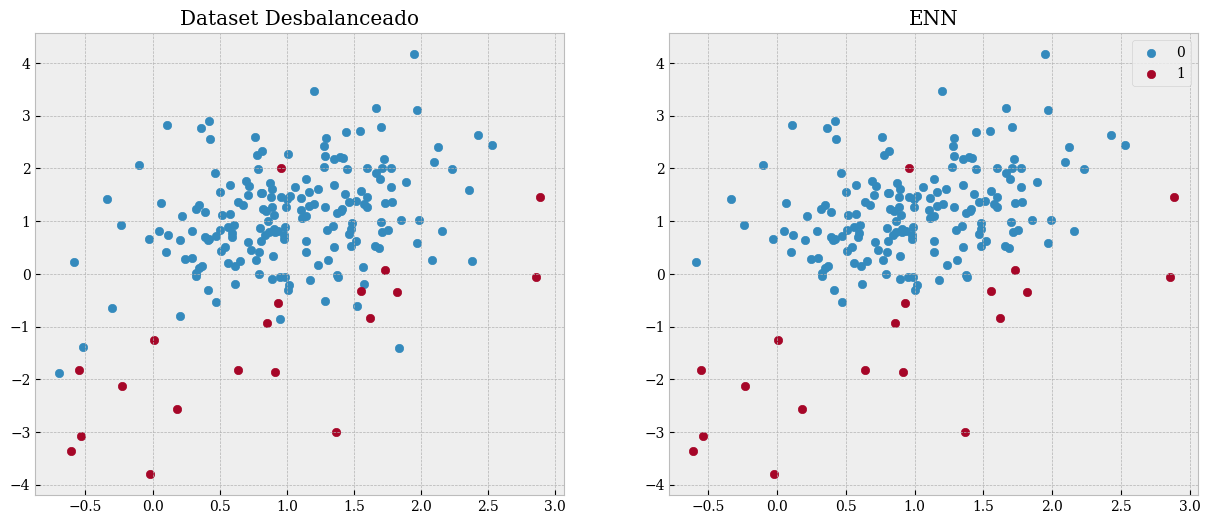

In [6]:
##########  DATASET DESBALANCEADO   #############
plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

plt.figure(figsize=(10,6))
# definir dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9],
                           flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1],label = str(label))
axs[0].set_title('Dataset Desbalanceado')
#plt.legend()

under = EditedNearestNeighbours()
X_under, y_under = under.fit_resample(X,y)

counter= Counter(y_under)
print(counter)
# scatter plot dos exemplos por class label
#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  axs[1].scatter(X_under[row_xi, 0], X_under[row_xi, 1], label = str(label))

#plt.grid(False)
axs[1].set_title('ENN')
plt.legend()
#fig.tight_layout()
plt.show()

Counter({0: 9900, 1: 100})


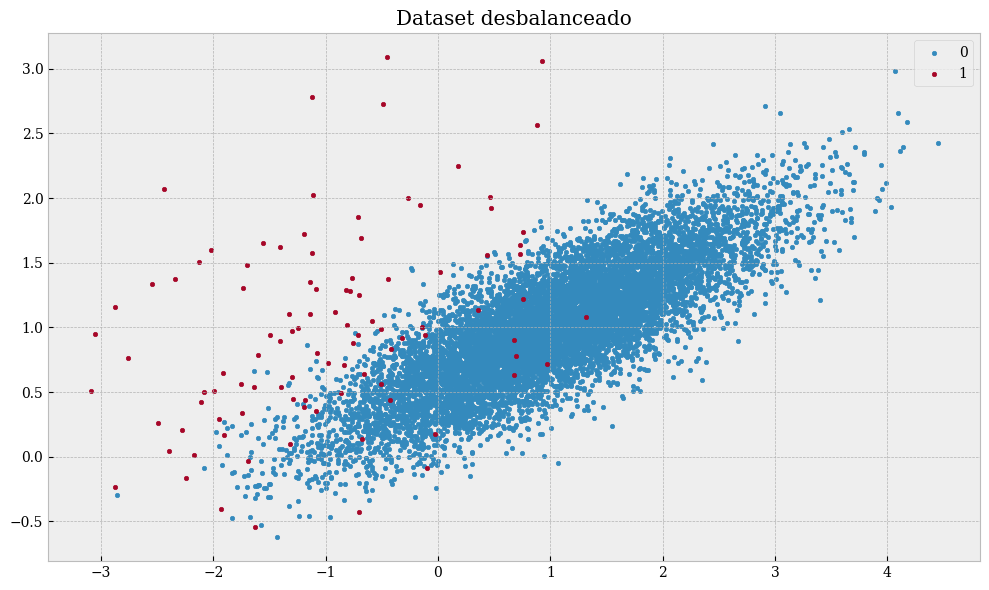

In [ ]:
##########  DATASET DESBALANCEADO   #############
plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

plt.figure(figsize=(10,6))
# definir dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

# scatter plot dos exemplos por class label
for label, _ in counter.items():
  row_xi = where(y == label)[0]
  plt.scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))

#plt.grid(False)
plt.title('Dataset desbalanceado')
plt.legend()
plt.tight_layout()
plt.savefig('dsdesbalanceado.png')
plt.show()

Counter({0: 9806, 1: 100})


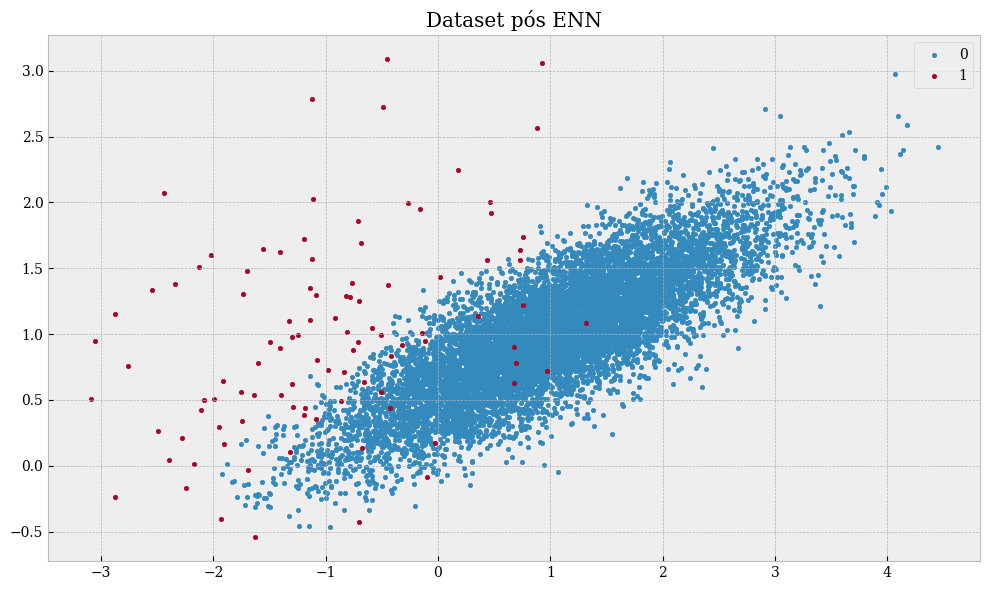

In [ ]:
##########  APLICAR ENN   #############
under = EditedNearestNeighbours()
X_under, y_under = under.fit_resample(X,y)

counter= Counter(y_under)
print(counter)

# scatter plot dos exemplos por class label
plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  plt.scatter(X_under[row_xi, 0], X_under[row_xi, 1], 10,label = str(label))

#plt.grid(False)
plt.title('Dataset pós ENN')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
# Avaliando o modelo
model = DecisionTreeClassifier()
#over = SMOTE()
under = EditedNearestNeighbours()
steps = [('under', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Mean ROC AUC: %.3f' % (score))

Mean ROC AUC: 0.818


In [ ]:
# Avaliando o modelo com ADASYN
model = DecisionTreeClassifier()
over = ADASYN()
under = EditedNearestNeighbours()
cnn = CondensedNearestNeighbour()
steps = [('under', under), ('cnn', cnn), ('over', over), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Mean ROC AUC: %.3f' % (score))

Mean ROC AUC: 0.801
